In [20]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [21]:
zip_data = "Project1_Zipcode_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [26]:
zip_data_df.describe()

,Zip Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No HS Diploma Rate,Total HS Diploma,...,Never Married Rate,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status,Lat,Lng
count,33120,33120,33120,33120,32795,33120,32803,33120,32762,33120,...,32802,33120,32802,33120,32802,33120,32802,33120,33104,33104
unique,33120,15566,663,19651,20942,6340,28917,4619,27526,7246,...,28879,11031,29329,2868,26592,4625,27634,14461,4013,6152
top,47712,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,40.7,-96.7
freq,1,317,567,2164,317,1884,1567,1863,1505,798,...,602,627,309,2047,1729,1515,1197,318,143,71


In [8]:
zip_data_df.head()

,Zip Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Total No HS Diploma,No HS Diploma Rate,Total HS Diploma,...,Never Married Rate,Married,Married Rate,Widowed,Widowed Rate,Divorced,Divorced Rate,Over 15 Marital Status,Lat,Lng
0,00601,17599.0,38.9,11757.0,7041.0,11282.0,64.105915108813,4288,36.12772769399275,2967,...,39.26204924321685,5846,40.775615540210644,863,6.019390388505267,1999,13.942944828067239,14337.0,NaN,NaN
1,00602,39209.0,40.9,16190.0,8978.0,20428.0,52.10028309826826,9407,34.17620345140781,6322,...,36.6230064883876,14586,44.22412224849918,2136,6.47625977806076,4181,12.676611485052453,32982.0,18.36,-67.18
2,00603,50135.0,40.4,16645.0,10897.0,25176.0,50.21641567767029,10310,29.464719499299818,9657,...,35.96377438262708,17614,42.312866339963485,3098,7.442106274622851,5945,14.281253002786586,41628.0,18.45,-67.11
3,00606,6304.0,42.8,13387.0,5960.0,4092.0,64.91116751269035,2147,49.40174873446848,1351,...,45.994684889901286,1880,35.68716780561883,431,8.181473044798786,534,10.136674259681094,5268.0,18.2,-66.9
4,00610,27590.0,41.4,18741.0,9266.0,12553.0,45.498368974266036,6260,32.553302132085285,6032,...,34.993288009353485,10581,45.81907937470229,1772,7.6733209197592345,2659,11.514311696184992,23093.0,18.28,-67.13


In [4]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

NameError: name 'gkey' is not defined

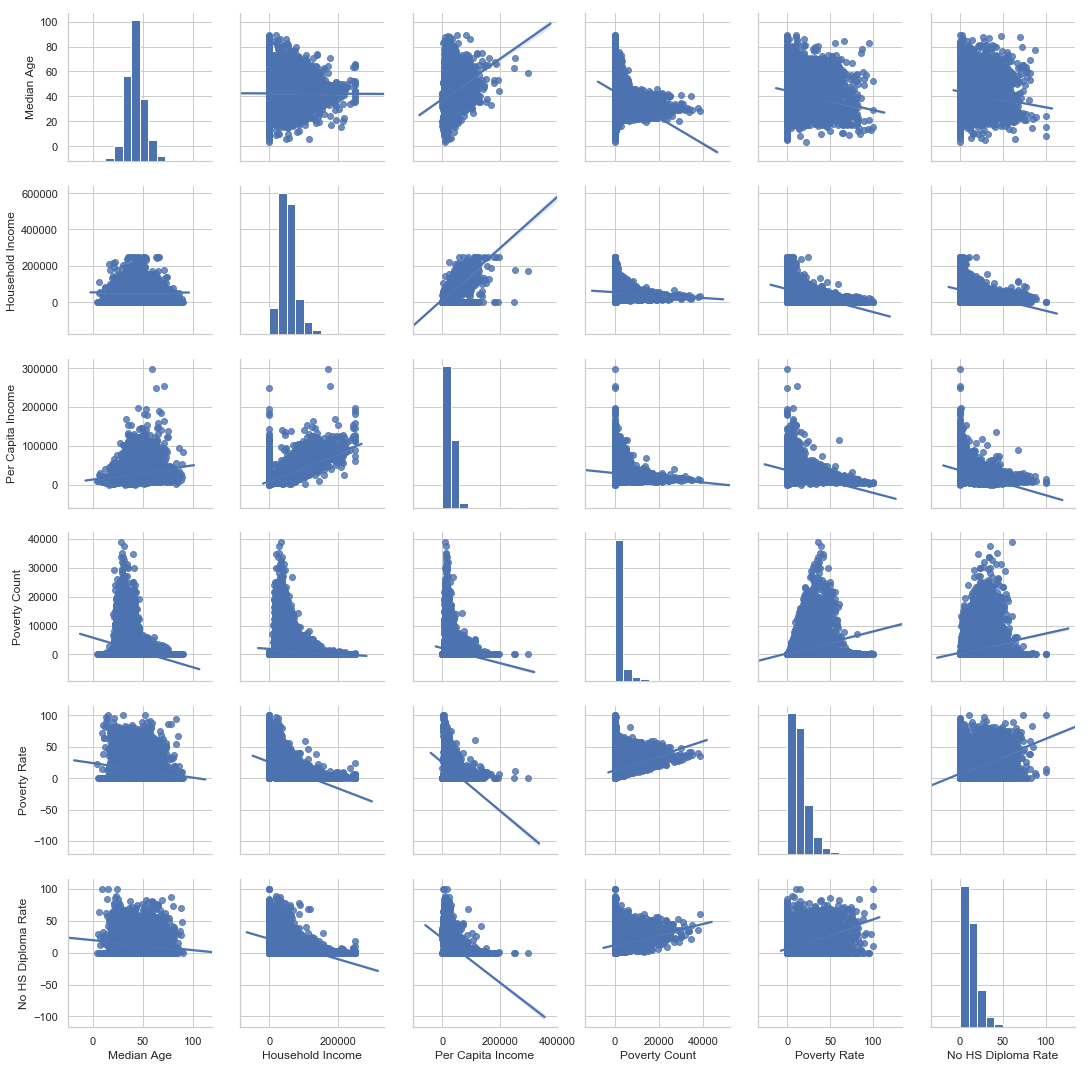

In [29]:
# household income vs total no hs diploma scatter plot

# convert columns to float for processing
zip_data_df["Median Age"] = zip_data_df["Median Age"].astype(float)
zip_data_df["Household Income"] = zip_data_df["Household Income"].astype(float)
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["Poverty Count"] = zip_data_df["Poverty Count"].astype(float)
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No HS Diploma Rate"] = zip_data_df["No HS Diploma Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

# create a new df containing all numeric columns
census_data_numeric = zip_data_df[["Median Age", "Household Income", "Per Capita Income", \
                                            "Poverty Count", "Poverty Rate", "No HS Diploma Rate"]]

# seaborn pair plot
sns.pairplot(census_data_numeric, kind="reg")

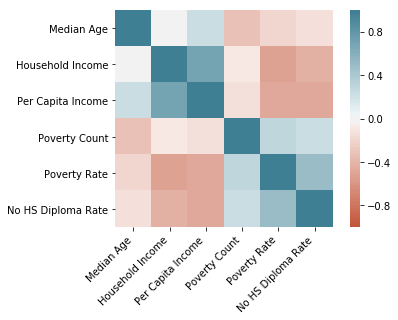

In [11]:
# heat map on correlation matrix
corr = census_data_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

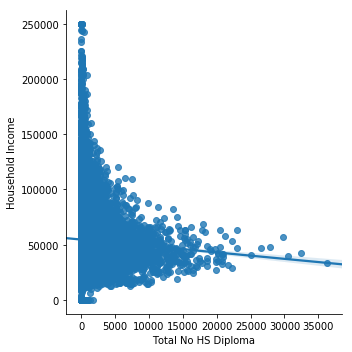

In [8]:
sns.lmplot(y='Household Income', x='Total No HS Diploma', data=census_data_numeric)

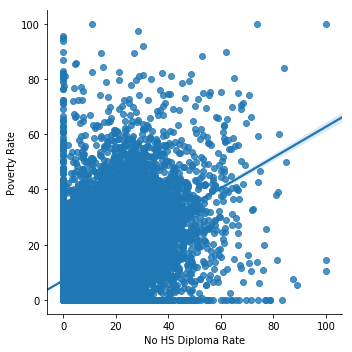

In [12]:
sns.lmplot(y='Poverty Rate', x='No HS Diploma Rate', data=census_data_numeric)

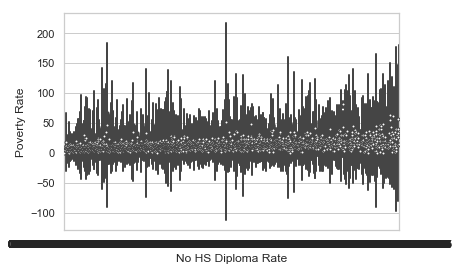

In [22]:
import seaborn as sns
ax = sns.violinplot(x="No HS Diploma Rate", y="Poverty Rate", data=census_data_numeric)

In [30]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No HS Diploma Rate"] = zip_data_df["No HS Diploma Rate"].astype(float)

In [31]:
# create a new df containing all numeric columns
zipcode_data_numeric = zip_data_df[["Poverty Rate", "No HS Diploma Rate"]]

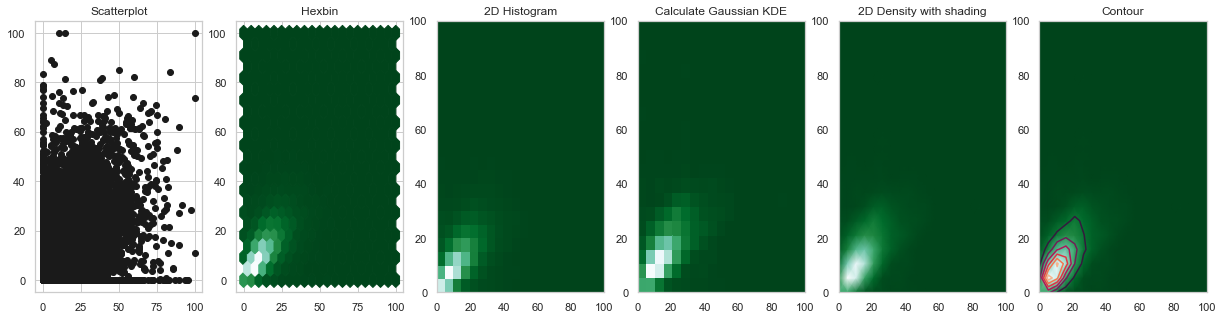

In [32]:
from scipy.stats import kde
 

# Create data: 1000 points
data= zipcode_data_numeric['Poverty Rate'].sample(n=1000, random_state=1), zipcode_data_numeric['No HS Diploma Rate'].sample(n=1000, random_state=1)

x = zipcode_data_numeric['Poverty Rate']
#.sample(n=1000, random_state=1)
y = zipcode_data_numeric['No HS Diploma Rate']
#.sample(n=1000, random_state=1)
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

In [15]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)

In [16]:
# create a new df containing all numeric columns
collegezipcode_data_numeric = zip_data_df[["Poverty Rate", "College Degree Rate"]]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Text(0.95, 0.9, 'R_Value:nan')

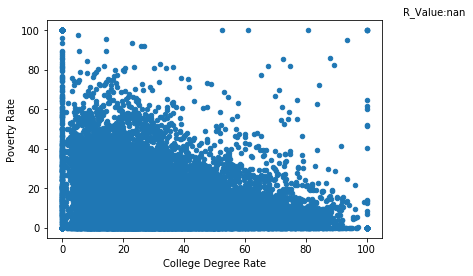

In [17]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(collegezipcode_data_numeric["Poverty Rate"], collegezipcode_data_numeric["College Degree Rate"])
fit = slope * collegezipcode_data_numeric["College Degree Rate"] + intercept

collegezipcode_data_numeric.plot.scatter(x="College Degree Rate", y="Poverty Rate")
plt.plot(collegezipcode_data_numeric["College Degree Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

#plt.savefig("./Data/CollegePovertyratervalue.png")

In [22]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No HS Diploma Rate"] = zip_data_df["No HS Diploma Rate"].astype(float)

In [23]:
nohszipcode_data_numeric = zip_data_df[["Poverty Rate", "No HS Diploma Rate"]]

Text(0.95, 0.9, 'R_Value:nan')

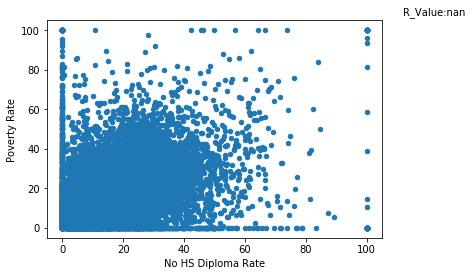

In [24]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(nohszipcode_data_numeric["Poverty Rate"], nohszipcode_data_numeric["No HS Diploma Rate"])
fit = slope * nohszipcode_data_numeric["No HS Diploma Rate"] + intercept

nohszipcode_data_numeric.plot.scatter(x="No HS Diploma Rate", y="Poverty Rate")
plt.plot(nohszipcode_data_numeric["No HS Diploma Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

#plt.savefig("./Data/NoHSPovertyratervalue.png")

In [25]:
r_value

nan